<a href="https://colab.research.google.com/github/wandalistathea/linear-regression-randomly-created-dataset/blob/master/Kaggle_Linear_Regression_(Randomly_created_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [ ]:
data_train = pd.read_csv('datasets_train.csv')
data_test = pd.read_csv('datasets_test.csv')

In [ ]:
data_train.head()
data_test.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


### EDA

In [ ]:
data_train.shape
data_test.shape

(300, 2)

In [ ]:
data_train.describe()
data_test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


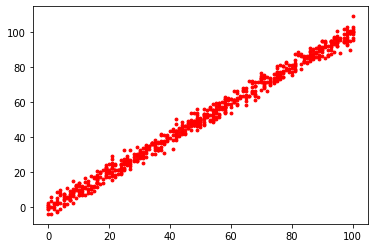

In [ ]:
# Coba melihat plot data
plt.scatter(data_train.x, data_train.y, color = 'red', s = 8) # Plotnya linear

In [ ]:
# Cek data
data_train.info()
data_test.info()
data_train.isnull().sum() # Pada variabel y (data_train) terdapat 1 data yang null
data_test.isnull().sum() # Tidak ada data yang null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


x    0
y    0
dtype: int64

### Feature Engineering
Mengatasi missing value

In [ ]:
# Menghapus data yang null (dihapus karena hanya 1 data dibanding 1000)
data_train.dropna(inplace = True)
data_train.isnull().sum() # Sudah tidak ada data yang null

x    0
y    0
dtype: int64

### Modelling

In [ ]:
# Definisikan variabel
x = data_train.iloc[:, 0].values
y = data_train.iloc[:, 1].values
x = x.reshape(-1, 1) # Reshape karena model akan memerlukan 2d array
y = y.reshape(-1, 1)

In [ ]:
# Membuat model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Membuat prediksi dari data_test
x_test = data_test.iloc[:, 0].values
y_test = data_test.iloc[:, 1].values
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_pred = regressor.predict(x_test)

In [ ]:
# Melihat akurasi (dengan r2)
from sklearn.metrics import r2_score
print('Accuracy: {:.2f}%'.format(r2_score(y_test, y_pred).mean()*100))

Accuracy: 98.88%


In [ ]:
# Melihat akurasi (dengan k-fold cross validation)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x, y = y, cv = 10)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))

Accuracy: 99.02%
